In [1]:
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ir.__version__

'0.18.1.dev10+ge02a82b'

In [3]:
import scanpy as sc

In [4]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [5]:
import muon as mu

In [6]:
import numpy as np

In [7]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    #adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    #adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [8]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
#adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    #adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    #adatas_gex_2021[sample] = adata_gex_2021

In [9]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11mix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

### TCR 2019 NORMAL

In [10]:
adata_tcr

AnnData object with n_obs × n_vars = 859 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

In [11]:
# Merge anndata objects
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [12]:
adata_tcr.obs

""
cell_id
AAACCTGAGTCTTGCA-1_10mix1
AAACCTGAGTTAAGTG-1_10mix1
AAACCTGCAGGATCGA-1_10mix1
AAACCTGCATACCATG-1_10mix1
AAACCTGCATTGAGCT-1_10mix1
...
TTTGCGCTCGGTGTTA-1_GF2
TTTGTCAAGGCTAGCA-1_GF2
TTTGTCAAGTGCCAGA-1_GF2


### TCR 2021 TUMOR

In [13]:
adata_tcr_2021

AnnData object with n_obs × n_vars = 7406 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

In [14]:
# Merge anndata objects
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [15]:
adata_tcr_2021.obs

""
cell_id
AAACCTGAGAGCCTAG-1_10mix-ICI1
AAACCTGAGGCTCTTA-1_10mix-ICI1
AAACCTGAGGGCACTA-1_10mix-ICI1
AAACCTGAGGGCTTGA-1_10mix-ICI1
AAACCTGAGGTTACCT-1_10mix-ICI1
...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus
TTTGTCATCCCTTGCA-1_GF-ICI2-plus
TTTGTCATCTAACTGG-1_GF-ICI2-plus


### Load GEX

In [16]:
adata = sc.read_h5ad("/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/results/40_gex_surface_prot/13_january_2025/mapped_data/mapped_til_colon.h5ad")

In [17]:
adata.var

,ensembl_id,feature_types,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,n_counts,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches
ensembl_id,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845,ENSMUSG00000033845,Gene Expression,Mrpl15,False,False,15644,1.169332,0.774419,78.998805,87104.710938,11.374878,21484,24002.0,False,NaN,1.327405,5.528502,0.963611,0
ENSMUSG00000025903,ENSMUSG00000025903,Gene Expression,Lypla1,False,False,14215,1.073952,0.729456,80.917158,79999.789062,11.289792,19725,20230.0,False,NaN,1.222800,5.273152,0.967138,0
ENSMUSG00000033813,ENSMUSG00000033813,Gene Expression,Tcea1,False,False,30545,2.373390,1.215918,58.995046,176796.218750,12.082759,40436,45545.0,False,NaN,2.598504,8.122003,0.966765,0
ENSMUSG00000033793,ENSMUSG00000033793,Gene Expression,Atp6v1h,False,False,10560,0.817953,0.597711,85.823791,60930.109375,11.017499,14481,14530.0,False,3409.5,0.916394,4.352974,0.998627,2
ENSMUSG00000025907,ENSMUSG00000025907,Gene Expression,Rb1cc1,False,False,15940,1.282039,0.825069,78.601442,95500.367188,11.466896,21130,21450.0,False,2045.0,1.386223,6.238710,1.023630,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000063897,ENSMUSG00000063897,Gene Expression,CAAA01118383.1,False,False,7156,0.550870,0.438816,90.393470,41034.832031,10.622201,9764,9803.0,False,2894.0,0.614820,3.085952,0.994008,1
ENSMUSG00000051412,ENSMUSG00000051412,Gene Expression,Vamp7,False,False,4551,0.335245,0.289115,93.890537,24972.708984,10.125579,6640,6672.0,False,2992.0,0.401343,2.003972,0.963557,1
ENSMUSG00000079834,ENSMUSG00000079834,Gene Expression,Tmlhe,False,False,488,0.038844,0.038109,99.344887,2893.559814,7.970588,592,598.0,True,978.0,0.039054,0.227810,0.900718,9


In [18]:
adata.obs.origin =  adata.obs.origin.replace("colon","normal")

/tmp/ipykernel_1255565/3856492589.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.origin =  adata.obs.origin.replace("colon","normal")


In [19]:
adata.obs.origin =  adata.obs.origin.replace("til","tumor")

/tmp/ipykernel_1255565/3216722835.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs.origin =  adata.obs.origin.replace("til","tumor")


In [20]:
adata_normal = adata[adata.obs["origin"]=="normal"]

In [21]:
adata_tumor = adata[adata.obs["origin"]=="tumor"]

### Transform TCR 2019 NORMAL

In [22]:
adata_tcr.obs["sample_id"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]

In [23]:
adata_tcr.obs["group"] = adata_tcr.obs["sample_id"].map(lambda x: samples[x]["group"])
adata_tcr.obs["condition"] = adata_tcr.obs["sample_id"].map(lambda x: samples[x]["condition"])

In [24]:
adata_tcr.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1,10mix1,10mix,naive
...,...,...,...
TTTGCGCTCGGTGTTA-1_GF2,GF2,GF,naive
TTTGTCAAGGCTAGCA-1_GF2,GF2,GF,naive
TTTGTCAAGTGCCAGA-1_GF2,GF2,GF,naive


### Transform TCR 2021 TUMOR

In [25]:
adata_tcr_2021.obs["sample_id"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]

In [26]:
adata_tcr_2021.obs["group"] = adata_tcr_2021.obs["sample_id"].map(lambda x: samples[x]["group"])
adata_tcr_2021.obs["condition"] = adata_tcr_2021.obs["sample_id"].map(lambda x: samples[x]["condition"])

In [27]:
adata_tcr_2021.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGAGCCTAG-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGCTCTTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCACTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCTTGA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGTTACCT-1_10mix-ICI1,10mix-ICI1,10mix,ICI
...,...,...,...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI


### Merge TCR TUMOR & NORMAL

In [28]:
adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [29]:
adata_tcr_merge.obs

,sample_id,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1_0,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1_0,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1_0,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1_0,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1_0,10mix1,10mix,naive
...,...,...,...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI


### Merge GEX TUMOR & NORMAL

In [30]:
adata_gex_merge = anndata.concat([adata_normal,adata_tumor], index_unique="_")

In [31]:
adata_gex_merge.obs

,_scvi_batch,_scvi_labels,batch,batch_id,cell_type,condition,is_doublet,is_outlier,is_outlier_counts,is_outlier_genes,...,total_counts_mt,total_counts_ribo,value,outlier,mt_outlier,ribo_outlier,leiden_res0_25,leiden_res0_5,leiden_res1,functional.cluster
AAACCTGAGTTAAGTG_1_10mix1_0,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,86.830162,605.018494,0,False,False,False,4,4,6,NaN
AAACCTGCAGGATCGA_1_10mix1_0,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,75.581802,587.908875,0,False,False,False,3,3,2,NaN
AAACCTGCATAACCTG_1_10mix1_0,0,0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,86.354584,287.226318,0,False,False,False,3,3,14,NaN
AAACCTGCATACCATG_1_10mix1_0,0,0,0,1,CD8_EarlyActiv,10mix,singlet,False,False,False,...,82.344032,258.087860,0,False,False,False,3,3,2,NaN
AAACCTGGTGTGCCTG_1_10mix1_0,0,0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,94.393898,697.110291,0,False,False,False,3,3,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCCTTGCA_1_GF_ICI2_plus_1,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,83.939003,658.834290,0,False,False,False,0,0,4,CD8_Tex
TTTGTCATCGTTGCCT_1_GF_ICI2_plus_1,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,84.472771,641.084961,0,False,False,False,0,6,10,CD8_Tex
TTTGTCATCTAACTGG_1_GF_ICI2_plus_1,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,35.431831,378.922791,0,False,False,False,2,2,1,CD8_Tex
TTTGTCATCTCTGTCG_1_GF_ICI2_plus_1,0,0,7,ICI2,CD8_Tex,GF-plus,singlet,False,False,False,...,44.855644,628.218262,0,False,False,False,0,2,1,CD8_Tex


### Create MUDATA

In [32]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

### Transfor obs names for gex and tcr matching

In [33]:
mdata.obs.index = mdata.obs.index.str.replace('-', '_')

In [34]:
# Replace "-" with "_" in the 'obs_names' column
mdata["airr"].obs_names = mdata["airr"].obs_names.str.replace('-', '_')

In [35]:
# Replace "-" with "_" in the 'obs_names' column
mdata["gex"].obs_names = mdata["gex"].obs_names.str.replace('-', '_')

In [36]:
len(set(mdata["gex"].obs_names) & set(mdata["airr"].obs_names))

51453

In [37]:
mdata

MuData object with n_obs × n_vars = 131971 × 11945
  2 modalities
    gex:	60459 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'functional.cluster'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      layers:	'counts', 'denoised', 'logcounts'
    airr:	71512 x 0
      obs:	'sample_id', 'group', 'condition'
      obsm:	'airr'

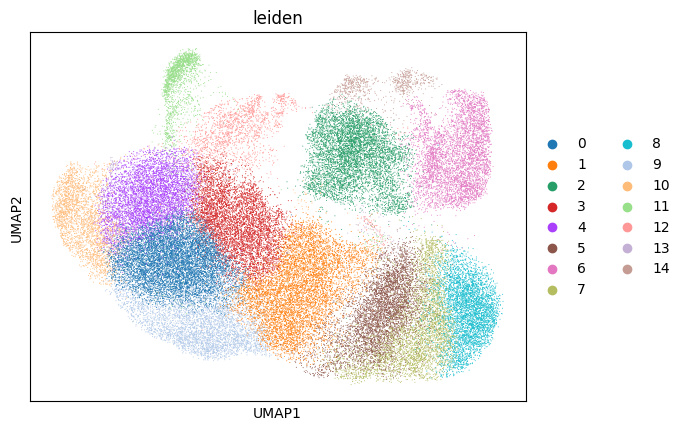

In [38]:
sc.pl.umap(mdata["gex"], color = "leiden")

### Create MDATA GEX & TCR 2019 NORMAL

In [39]:
mdata_normal = mu.MuData({"gex": adata_normal, "airr": adata_tcr})

In [40]:
mdata_normal

MuData object with n_obs × n_vars = 26356 × 11945
  2 modalities
    gex:	11149 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'functional.cluster'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'condition_colors', 'functional.cluster_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	15207 x 0
      obs:	'sample_id', 'group', 'condition'
      obsm:	'airr'

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


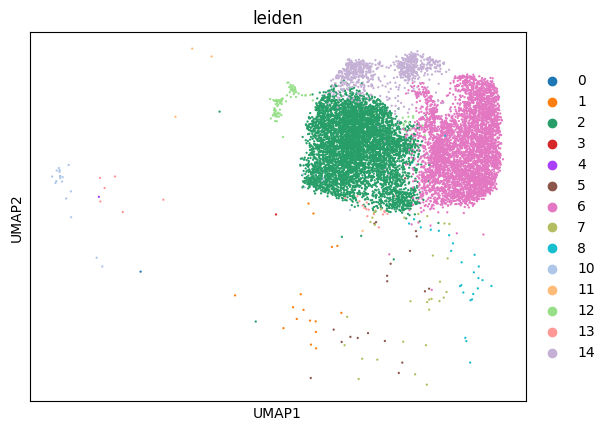

In [41]:
sc.pl.umap(mdata_normal["gex"], color = "leiden")

### Create MDATA GEX & TCR 2021 TUMOR

In [42]:
mdata_tumor= mu.MuData({"gex": adata_tumor, "airr": adata_tcr_2021})

In [43]:
mdata_tumor

MuData object with n_obs × n_vars = 105615 × 11945
  2 modalities
    gex:	49310 x 11945
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'functional.cluster'
      var:	'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'condition_colors', 'functional.cluster_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'neighbors_uncorrected', 'origin_colors', 'sample_id_colors', 'umap'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'neighbors_uncorrected_distances'
    airr:	56305 x 0
      obs:	'sample_id', 'group', 'condition'
      obsm:	'airr'

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


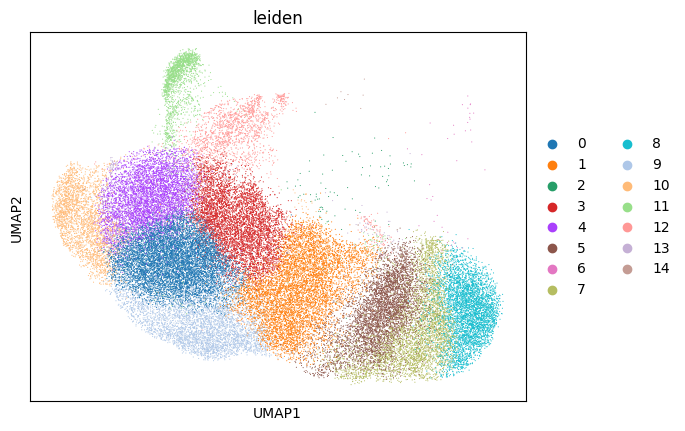

In [44]:
sc.pl.umap(mdata_tumor["gex"], color = "leiden")

### Transform mdata

In [45]:
sc.pp.filter_genes(mdata["gex"], min_cells=500)
sc.pp.filter_cells(mdata["gex"], min_genes=500)

In [46]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

In [47]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [48]:
# Define the conditions
normal_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata["airr"].obs["origin"] = mdata["airr"].obs["sample_id"].apply(
    lambda x: "colon" if x in normal_samples else "tumor"
)

In [49]:
mdata

MuData object with n_obs × n_vars = 131971 × 11945
  2 modalities
    gex:	59264 x 8391
      obs:	'_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'functional.cluster'
      var:	'n_cells'
      uns:	'leiden_colors', 'log1p', 'pca', 'neighbors', 'umap'
      obsm:	'X_pca', 'X_scAR', 'X_scVI', 'X_umap', 'X_umap_uncorrected'
      varm:	'PCs'
      layers:	'counts', 'denoised', 'logcounts'
      obsp:	'distances', 'connectivities'
    airr:	71512 x 0
      obs:	'sample_id', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [50]:
mdata["gex"].obs.index

Index(['AAACCTGAGTTAAGTG_1_10mix1_0', 'AAACCTGCAGGATCGA_1_10mix1_0',
       'AAACCTGCATAACCTG_1_10mix1_0', 'AAACCTGCATACCATG_1_10mix1_0',
       'AAACCTGGTGTGCCTG_1_10mix1_0', 'AAACCTGTCTTAACCT_1_10mix1_0',
       'AAACGGGCAAGGTTCT_1_10mix1_0', 'AAACGGGGTATTACCG_1_10mix1_0',
       'AAACGGGGTCGAGATG_1_10mix1_0', 'AAAGATGAGATCCCAT_1_10mix1_0',
       ...
       'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus_1',
       'TTTGTCATCAATAAGG_1_GF_ICI2_plus_1',
       'TTTGTCATCACGCATA_1_GF_ICI2_plus_1',
       'TTTGTCATCATGGTCA_1_GF_ICI2_plus_1',
       'TTTGTCATCCAGAGGA_1_GF_ICI2_plus_1',
       'TTTGTCATCCCTTGCA_1_GF_ICI2_plus_1',
       'TTTGTCATCGTTGCCT_1_GF_ICI2_plus_1',
       'TTTGTCATCTAACTGG_1_GF_ICI2_plus_1',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus_1',
       'TTTGTCATCTGTTGAG_1_GF_ICI2_plus_1'],
      dtype='object', length=59264)

In [51]:
mdata["airr"].obs.index

Index(['AAACCTGAGTCTTGCA_1_10mix1_0', 'AAACCTGAGTTAAGTG_1_10mix1_0',
       'AAACCTGCAGGATCGA_1_10mix1_0', 'AAACCTGCATACCATG_1_10mix1_0',
       'AAACCTGCATTGAGCT_1_10mix1_0', 'AAACCTGGTGTGCCTG_1_10mix1_0',
       'AAACCTGTCGCCCTTA_1_10mix1_0', 'AAACCTGTCTTAACCT_1_10mix1_0',
       'AAACGGGCAAGGGTCA_1_10mix1_0', 'AAACGGGCAAGGTTCT_1_10mix1_0',
       ...
       'TTTGTCAGTGCTTCTC_1_GF_ICI2_plus_1',
       'TTTGTCAGTTCGCTAA_1_GF_ICI2_plus_1',
       'TTTGTCATCAATAAGG_1_GF_ICI2_plus_1',
       'TTTGTCATCACGCATA_1_GF_ICI2_plus_1',
       'TTTGTCATCATGGTCA_1_GF_ICI2_plus_1',
       'TTTGTCATCCAGAGGA_1_GF_ICI2_plus_1',
       'TTTGTCATCCCTTGCA_1_GF_ICI2_plus_1',
       'TTTGTCATCTAACTGG_1_GF_ICI2_plus_1',
       'TTTGTCATCTCTGTCG_1_GF_ICI2_plus_1',
       'TTTGTCATCTGTTGAG_1_GF_ICI2_plus_1'],
      dtype='object', name='cell_id', length=71512)

In [52]:
mdata.obs.index = mdata.obs.index.str.replace('-', '_', regex=False)


In [53]:
mdata["airr"].obs

,sample_id,group,condition,receptor_type,receptor_subtype,chain_pairing,origin
cell_id,,,,,,,
AAACCTGAGTCTTGCA_1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,colon
AAACCTGAGTTAAGTG_1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,orphan VDJ,colon
AAACCTGCAGGATCGA_1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,colon
AAACCTGCATACCATG_1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,colon
AAACCTGCATTGAGCT_1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,colon
...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,tumor
TTTGTCATCCCTTGCA_1_GF_ICI2_plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,single pair,tumor
TTTGTCATCTAACTGG_1_GF_ICI2_plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,tumor


In [54]:
mdata.obs

,gex:_scvi_batch,gex:_scvi_labels,gex:batch,gex:batch_id,gex:cell_type,gex:condition,gex:is_doublet,gex:is_outlier,gex:is_outlier_counts,gex:is_outlier_genes,...,gex:leiden_res0_25,gex:leiden_res0_5,gex:leiden_res1,gex:functional.cluster,airr:sample_id,airr:group,airr:condition,airr:receptor_type,airr:receptor_subtype,airr:chain_pairing
AAACCTGAGTTAAGTG_1_10mix1_0,0.0,0.0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,4,4,6,NaN,NaN,NaN,NaN,TCR,TRA+TRB,orphan VDJ
AAACCTGCAGGATCGA_1_10mix1_0,0.0,0.0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,3,3,2,NaN,NaN,NaN,NaN,TCR,TRA+TRB,single pair
AAACCTGCATAACCTG_1_10mix1_0,0.0,0.0,0,1,CD8_Tex,10mix,singlet,False,False,False,...,3,3,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATACCATG_1_10mix1_0,0.0,0.0,0,1,CD8_EarlyActiv,10mix,singlet,False,False,False,...,3,3,2,NaN,NaN,NaN,NaN,TCR,TRA+TRB,single pair
AAACCTGGTGTGCCTG_1_10mix1_0,0.0,0.0,0,1,CD8_NaiveLike,10mix,singlet,False,False,False,...,3,3,2,NaN,NaN,NaN,NaN,TCR,TRA+TRB,single pair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA_1_GF_ICI2_plus_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ
TTTGTCATCCCTTGCA_1_GF_ICI2_plus_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,single pair
TTTGTCATCTAACTGG_1_GF_ICI2_plus_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ
TTTGTCATCTCTGTCG_1_GF_ICI2_plus_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,single pair


In [ ]:
mdata.update()

In [ ]:
#mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

In [ ]:
mdata["gex"].var

In [ ]:
mdata["gex"].obs.cell_type = mdata["gex"].obs.cell_type.replace("nan","CD8_NaiveLike")

In [ ]:
mdata.update()

In [ ]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000055170"], ax=ax0, show=False, frameon=False, cmap= "Reds")
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:origin"], ax=ax1, show=False, frameon=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:cell_type"], ax=ax2, show=False, frameon=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3, frameon=False)

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(10, 5) ,gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000055170"], ax=ax0, show=False, frameon=False, cmap= "Reds")
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:cell_type"], ax=ax1, show=False, frameon=False)


In [ ]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample_id"
)


In [ ]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:cell_type"
)


In [ ]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:condition"
)


In [ ]:
_ = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [ ]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(mdata.obs["airr:chain_pairing"].isin(["extra VJ", "extra VDJ", "two full chains", "multichain"]))
        / mdata["airr"].n_obs
    )
)

In [ ]:
mu.pl.embedding(mdata, basis="gex:umap", color="airr:chain_pairing", groups="multichain")

In [ ]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

In [ ]:
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

In [ ]:
mdata

In [ ]:
ax = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:origin")

In [ ]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(mdata)


In [ ]:
mdata["airr"].obs["chain_pairing"]=mdata["airr"].obs["chain_pairing"].astype("string")

In [ ]:
mdata["airr"].obs.info()

In [ ]:
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

In [ ]:
ir.pp.ir_dist(
    mdata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

In [ ]:
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any")

In [ ]:
ir.tl.clonotype_network(mdata, min_cells=2, sequence="aa", metric="alignment")

In [ ]:
_ = ir.pl.clonotype_network(
    mdata,
    color="gex:sample_id",
    label_fontsize=9,
    panel_size=(7, 7),
    base_size=2
)


In [ ]:
_ = ir.pl.clonal_expansion(
    mdata,
    target_col="clone_id",
    groupby="gex:cell_type"
)


In [ ]:
_ = ir.pl.alpha_diversity(
    mdata,
    metric="normalized_shannon_entropy",
    groupby="gex:cell_type"
)


In [ ]:
ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_alignment")

In [ ]:
_ = ir.pl.clonotype_modularity(mdata, base_size=20)

In [ ]:
clonotypes_top_modularity = list(
	mdata.obs.set_index("airr:cc_aa_alignment")["airr:clonotype_modularity"]
	.sort_values(ascending=False)
	.index.unique()
	.values[:1]
)

In [ ]:
mu.pl.embedding(mdata,basis="gex:tsne", color=["gex:cell_type"])
mu.pl.embedding(
    mdata,
    basis="gex:tsne",
    color="airr:cc_aa_alignment",
    groups=clonotypes_top_modularity
)
